In [47]:
%load_ext autoreload
%autoreload

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

sys.path.append('../../utils/')
from utils import feature_selection

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Features relevance

In [8]:
gt = pd.read_csv('../../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

tree = DecisionTreeClassifier(max_depth=4,min_samples_split=0.1,min_samples_leaf=10,random_state=0)
tree.fit(data_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

The following commands allow us to see how important each feature is in the decision process.

In [9]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03212446 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.27084986 0.         0.
 0.0290191  0.         0.         0.         0.         0.66800658
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

Text(0, 0.5, 'Feature')

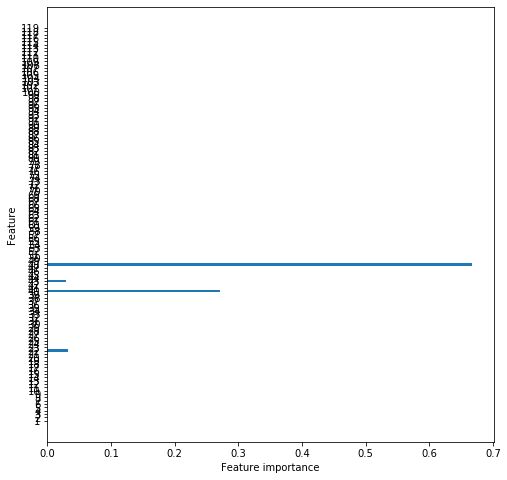

In [10]:
n_features = data.shape[1]
plt.rcParams["figure.figsize"] = (8,8)
plt.barh(range(n_features), tree.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), np.arange(1,120)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")

As we can see, out of 119 features only a very few are actually used by the learning algorithm. Let's apply some pruning on the features to see if it improves the accuracies (or even the speed of the process).

In [48]:
feature_selection('../../../dumps/various_sizes/8K.csv',0.15,"tree")

['f40', 'f43', 'f48']
['f40', 'f43', 'f48']
--------
['f40', 'f48']
['f40', 'f48']
--------
['f40', 'f48']
['f40', 'f48']
--------
['f40', 'f48']
['f40', 'f48']
--------
['f40', 'f48']
['f40', 'f48']
--------
Execution          Features selected            Training set acc    Test acc    Time (s)
-----------------  -------------------------  ------------------  ----------  ----------
Classic            ['f1',...,'f119']                    0.938406    0.94896     0.198879
K best features    ['f22' 'f40' 'f43' 'f48']            0.938406    0.94896     0.112753
Iterative process  ['f40', 'f48']                       0.936043    0.943919    0.495032


Let's see if the performance can be improved when using a larger dataset which is around twice the size of the previous one (16000 entries).

In [50]:
feature_selection('../../../dumps/various_sizes/16K.csv',0.15,"tree")

['f22', 'f40', 'f43', 'f48']
['f22', 'f40', 'f43', 'f48']
--------
['f22', 'f40', 'f43', 'f48']
['f22', 'f40', 'f43', 'f48']
--------
['f22', 'f40', 'f43', 'f48']
['f22', 'f40', 'f43', 'f48']
--------
['f40', 'f43', 'f48']
['f40', 'f43', 'f48']
--------
['f40', 'f43', 'f48']
['f40', 'f43', 'f48']
--------
Execution          Features selected            Training set acc    Test acc    Time (s)
-----------------  -------------------------  ------------------  ----------  ----------
Classic            ['f1',...,'f119']                    0.927191    0.922693    0.391371
K best features    ['f29' 'f40' 'f43' 'f48']            0.927191    0.922693    0.238297
Iterative process  ['f40', 'f43', 'f48']                0.926957    0.923317    0.995682


We can notice that there's no difference between the results we get with and without the feature extraction in terms of accuracies, which mean that the model could definittely be simplified to a few features. The performances we get when applying our iterative process are also quite close, even slighly better but we suffer from time explosion while the K best features extraction decreases the overall time.